Done


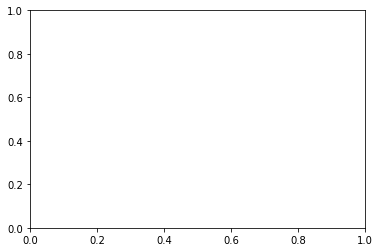

In [10]:
# triangle-animation.py
# 2018-12-06
# python3
# run on https://repl.it
# run on ubuntu 16.04 LTS
#
# 要執行本程式, 請按上方run▶
#
% matplotlib inline
import math
import matplotlib.pyplot as plot
from shapely import affinity
from shapely.geometry import LineString, Point
#
# 定義圖面函數
#
def set_graphic_area(width,height) :
        
    cm2inch = 1/2.54    # inch per cm
    #
    # define graphic area
    #
    left_margin = 1.0   # cm
    right_margin = 1.0  # cm
    #
    figure_width  = width  # cm , from xmin to xmax
    figure_height = height # cm , from ymin to ymax
    #
    top_margin = 1.0    # cm
    bottom_margin = 1.0 # cm
    #
    box_width = left_margin + figure_width + right_margin   # cm
    box_height = top_margin + figure_height + bottom_margin # cm
    #
    top_value    = 1.0 - top_margin / box_height
    bottom_value = bottom_margin / box_height
    left_value   = left_margin / box_width
    right_value  = 1.0 - right_margin / box_width
    #
    return (box_width*cm2inch,box_height*cm2inch,top_value,bottom_value,left_value,right_value,width)
    #
# end of def
#
# ------------------------------------------------------------
#
r0 = 10
tup7 = set_graphic_area(2*r0, 2*r0)
# 呼叫 pyplot.figure(), 建立一個圖表物件, 並成為目前圖表物件
fig = plot.figure(figsize=(tup7[0], tup7[1]))
# 圖表的繪圖區域被分為1個子圖, 1 row, 1 column, plot to index 1
ax = fig.add_subplot(1,1,1)
fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
#
# 設定X軸的顯示範圍, from xmin to xmax
plot.xlim(-tup7[6]/2, tup7[6]/2)
# 設定Y軸的顯示範圍, from ymin to ymax
plot.ylim(-tup7[6]/2, tup7[6]/2)
# get current axes, set X,Y same ratio & scale
plot.gca().set_aspect('equal', adjustable='box') 
ax.set_axis_on() # will turn on grid line
# ax.set_axis_off() # will turn off grid line
#
# --------------------------------------------------------------
#
R = 6 
H = 0.5 * R
L = 0.5 * R
#
lightBlue   = ( 38/255, 185/255, 255/255)
lightPink   = (255/255,  94/255, 255/255)
lightGreen  = ( 94/255, 255/255,  94/255)
lightOrange = (255/255, 168/255, 111/255)
lightYellow = (255/255, 247/255,  74/255)
#
triA1x = H * math.cos(1*math.pi/6)
triA1y = H * math.sin(1*math.pi/6)
triA2x = H * math.cos(5*math.pi/6)
triA2y = H * math.sin(5*math.pi/6)
triA3x = H * math.cos(9*math.pi/6)
triA3y = H * math.sin(9*math.pi/6)
#
pA = (triA1x, triA1y)
pB = (triA2x, triA2y)
pC = (triA3x, triA3y)
#
line_AB = LineString([pA, pB])
mid_line_AB = line_AB.interpolate(0.5, normalized = True)
ty1 = 2*abs(mid_line_AB.y)
ty2 = 2*H
tx = Point(pA).distance(Point(pB))
#
# define 反射變換 matrix for shapely
reflect_about_Xaxis  = [ 1, 0, 0,-1, 0,0]   
reflect_about_Yaxis  = [-1, 0, 0, 1, 0,0]   
reflect_about_Origin = [-1, 0, 0,-1, 0,0]
#
reflect_about_Xaxis_move_Uty1  = [1, 0, 0,-1, 0, ty1]
reflect_about_Xaxis_move_Dty2  = [1, 0, 0,-1, 0,-ty2]   
#
triangle = LineString([pA, pB, pC])
xs, ys = triangle.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightBlue, fill=True, zorder=10)
#
triangle_U = affinity.affine_transform(triangle, reflect_about_Xaxis_move_Uty1)
xs, ys = triangle_U.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightYellow, fill=True, zorder=10)
#
triangle_L = affinity.translate(triangle,-tx, 0, 0)
xs, ys = triangle_L.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightOrange, fill=True, zorder=10)
#
triangle_D = affinity.affine_transform(triangle, reflect_about_Xaxis_move_Dty2)
xs, ys = triangle_D.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightGreen, fill=True, zorder=10)
#
triangle_R = affinity.translate(triangle, tx, 0, 0)
xs, ys = triangle_R.xy
ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightPink, fill=True, zorder=10)
#
ax.set_title('999', fontsize=22)
plot.savefig('999.png', format="png", dpi=72)
#
for i in range(0, 31, 3) :
    # 設定圖面大小
    r0 = 10
    tup7 = set_graphic_area(2*r0, 2*r0)
    fig = plot.figure(figsize=(tup7[0], tup7[1]))
    ax = fig.add_subplot(1,1,1)
    fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
    #
    plot.xlim(-tup7[6]/2, tup7[6]/2)
    plot.ylim(-tup7[6]/2, tup7[6]/2)
    plot.gca().set_aspect('equal', adjustable='box')
    ax.set_axis_off()
    #
    motif = affinity.rotate(triangle, i, (0,0))
    xs, ys = motif.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightBlue, fill=True, zorder=20)
    # -----------------------------------------
    new_pA = (xs[0], ys[0])
    new_tx0 = xs[0] - pA[0]
    new_ty0 = ys[0] - pA[1]
    #
    new_pB = (xs[1], ys[1])
    new_tx1 = xs[1] - pB[0]
    new_ty1 = ys[1] - pB[1]
    #
    new_pC = (xs[2], ys[2])
    new_tx2 = xs[2] - pC[0]
    new_ty2 = ys[2] - pC[1]
    #   
    new_triangle_U = affinity.translate(triangle_U, new_tx0, new_ty0, 0)
    motif_U = affinity.rotate(new_triangle_U, -i, new_pA)
    xs, ys = motif_U.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightYellow, fill=True, zorder=20)
    #
    new_triangle_L = affinity.translate(triangle_L, new_tx1, new_ty1, 0)
    motif_L = affinity.rotate(new_triangle_L, -i, new_pB)
    xs, ys = motif_L.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightOrange, fill=True, zorder=20)
    #
    new_triangle_D = affinity.translate(triangle_D, new_tx2, new_ty2, 0)
    motif_D = affinity.rotate(new_triangle_D, -i, new_pC)
    xs, ys = motif_D.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightGreen, fill=True, zorder=20)
    #
    new_triangle_R = affinity.translate(triangle_R, new_tx0, new_ty0, 0)
    motif_R = affinity.rotate(new_triangle_R, -i, new_pA)
    xs, ys = motif_R.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightPink, fill=True, zorder=20)
    #    
    if len(str(i)) == 1 :
       plot.savefig('00'+str(i)+'.png', format="png", dpi=72)
    # end if
    if len(str(i)) == 2 :
       plot.savefig('0'+str(i)+'.png', format="png", dpi=72)
    # end if
    if len(str(i)) == 3 :
       plot.savefig(str(i)+'.png', format="png", dpi=72)
    # end if
    #    
    plot.close('all')
    plot.cla()
# end for  
#
motif_U_tmp = motif_U
motif_L_tmp = motif_L
motif_D_tmp = motif_D
motif_R_tmp = motif_R
motif_tmp = motif
xs, ys = motif.xy
pA = (xs[0], ys[0])
pB = (xs[1], ys[1])
pC = (xs[2], ys[2])
#
for i in range(33, 61, 3) :
    # 設定圖面大小
    r0 = 10
    tup7 = set_graphic_area(2*r0, 2*r0)
    fig = plot.figure(figsize=(tup7[0], tup7[1]))
    ax = fig.add_subplot(1,1,1)
    fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
    #
    plot.xlim(-tup7[6]/2, tup7[6]/2)
    plot.ylim(-tup7[6]/2, tup7[6]/2)
    plot.gca().set_aspect('equal', adjustable='box')
    ax.set_axis_off()
    #
    motif = affinity.rotate(motif_tmp, i-30, (0,0))
    xs, ys = motif.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightBlue, fill=True, zorder=20)
    # -----------------------------------------
    new_pA = (xs[0], ys[0])
    new_tx0 = xs[0] - pA[0]
    new_ty0 = ys[0] - pA[1]
    #
    new_pB = (xs[1], ys[1])
    new_tx1 = xs[1] - pB[0]
    new_ty1 = ys[1] - pB[1]
    #
    new_pC = (xs[2], ys[2])
    new_tx2 = xs[2] - pC[0]
    new_ty2 = ys[2] - pC[1]
    #   
    new_triangle_U = affinity.translate(motif_U_tmp, new_tx0, new_ty0, 0)
    motif_U = affinity.rotate(new_triangle_U, -(i-30), new_pA)
    xs, ys = motif_U.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightYellow, fill=True, zorder=20)
    #
    new_triangle_L = affinity.translate(motif_L_tmp, new_tx1, new_ty1, 0)
    motif_L = affinity.rotate(new_triangle_L, -(i-30), new_pB)
    xs, ys = motif_L.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightOrange, fill=True, zorder=20)
    #
    new_triangle_D = affinity.translate(motif_D_tmp, new_tx2, new_ty2, 0)
    motif_D = affinity.rotate(new_triangle_D, -(i-30), new_pC)
    xs, ys = motif_D.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightGreen, fill=True, zorder=20)
    #
    new_triangle_R = affinity.translate(motif_R_tmp, new_tx2, new_ty2, 0)
    motif_R = affinity.rotate(new_triangle_R, -(i-30), new_pC)
    xs, ys = motif_R.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightPink, fill=True, zorder=20)
    #       
    if len(str(i)) == 2 :
       plot.savefig('0'+str(i)+'.png', format="png", dpi=72)
    # end if
    if len(str(i)) == 3 :
       plot.savefig(str(i)+'.png', format="png", dpi=72)
    # end if
    #    
    plot.close('all')
    plot.cla()
# end for  
#
motif_U_tmp = motif_U
motif_L_tmp = motif_L
motif_D_tmp = motif_D
motif_R_tmp = motif_R
motif_tmp = motif
xs, ys = motif.xy
pA = (xs[0], ys[0])
pB = (xs[1], ys[1])
pC = (xs[2], ys[2])
#
for i in range(63, 91, 3) :
    # 設定圖面大小
    r0 = 10
    tup7 = set_graphic_area(2*r0, 2*r0)
    fig = plot.figure(figsize=(tup7[0], tup7[1]))
    ax = fig.add_subplot(1,1,1)
    fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
    #
    plot.xlim(-tup7[6]/2, tup7[6]/2)
    plot.ylim(-tup7[6]/2, tup7[6]/2)
    plot.gca().set_aspect('equal', adjustable='box')
    ax.set_axis_off()
    #
    motif = affinity.rotate(motif_tmp, i-60, (0,0))
    xs, ys = motif.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightBlue, fill=True, zorder=20)
    # -----------------------------------------
    new_pA = (xs[0], ys[0])
    new_tx0 = xs[0] - pA[0]
    new_ty0 = ys[0] - pA[1]
    #
    new_pB = (xs[1], ys[1])
    new_tx1 = xs[1] - pB[0]
    new_ty1 = ys[1] - pB[1]
    #
    new_pC = (xs[2], ys[2])
    new_tx2 = xs[2] - pC[0]
    new_ty2 = ys[2] - pC[1]
    #   
    new_triangle_U = affinity.translate(motif_U_tmp, new_tx0, new_ty0, 0)
    motif_U = affinity.rotate(new_triangle_U, -(i-60), new_pA)
    xs, ys = motif_U.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightYellow, fill=True, zorder=20)
    #
    new_triangle_L = affinity.translate(motif_L_tmp, new_tx1, new_ty1, 0)
    motif_L = affinity.rotate(new_triangle_L, -(i-60), new_pB)
    xs, ys = motif_L.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightOrange, fill=True, zorder=20)
    #
    new_triangle_D = affinity.translate(motif_D_tmp, new_tx1, new_ty1, 0)
    motif_D = affinity.rotate(new_triangle_D, -(i-60), new_pB)
    xs, ys = motif_D.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightGreen, fill=True, zorder=20)
    #
    new_triangle_R = affinity.translate(motif_R_tmp, new_tx2, new_ty2, 0)
    motif_R = affinity.rotate(new_triangle_R, -(i-60), new_pC)
    xs, ys = motif_R.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightPink, fill=True, zorder=20)
    #       
    if len(str(i)) == 2 :
       plot.savefig('0'+str(i)+'.png', format="png", dpi=72)
    # end if
    if len(str(i)) == 3 :
       plot.savefig(str(i)+'.png', format="png", dpi=72)
    # end if
    #    
    plot.close('all')
    plot.cla()
# end for  
#
motif_U_tmp = motif_U
motif_L_tmp = motif_L
motif_D_tmp = motif_D
motif_R_tmp = motif_R
motif_tmp = motif
xs, ys = motif.xy
pA = (xs[0], ys[0])
pB = (xs[1], ys[1])
pC = (xs[2], ys[2])
#
for i in range(93, 121, 3) :
    # 設定圖面大小
    r0 = 10
    tup7 = set_graphic_area(2*r0, 2*r0)
    fig = plot.figure(figsize=(tup7[0], tup7[1]))
    ax = fig.add_subplot(1,1,1)
    fig.subplots_adjust(
                top    = tup7[2] ,
                bottom = tup7[3] ,
                left   = tup7[4] ,
                right  = tup7[5] ,
                )
    #
    plot.xlim(-tup7[6]/2, tup7[6]/2)
    plot.ylim(-tup7[6]/2, tup7[6]/2)
    plot.gca().set_aspect('equal', adjustable='box')
    ax.set_axis_off()
    #
    motif = affinity.rotate(motif_tmp, i-90, (0,0))
    xs, ys = motif.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightBlue, fill=True, zorder=20)
    # -----------------------------------------
    new_pA = (xs[0], ys[0])
    new_tx0 = xs[0] - pA[0]
    new_ty0 = ys[0] - pA[1]
    #
    new_pB = (xs[1], ys[1])
    new_tx1 = xs[1] - pB[0]
    new_ty1 = ys[1] - pB[1]
    #
    new_pC = (xs[2], ys[2])
    new_tx2 = xs[2] - pC[0]
    new_ty2 = ys[2] - pC[1]
    #   
    new_triangle_U = affinity.translate(motif_U_tmp, new_tx0, new_ty0, 0)
    motif_U = affinity.rotate(new_triangle_U, -(i-90), new_pA)
    xs, ys = motif_U.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightYellow, fill=True, zorder=20)
    #
    new_triangle_L = affinity.translate(motif_L_tmp, new_tx0, new_ty0, 0)
    motif_L = affinity.rotate(new_triangle_L, -(i-90), new_pA)
    xs, ys = motif_L.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightOrange, fill=True, zorder=20)
    #
    new_triangle_D = affinity.translate(motif_D_tmp, new_tx1, new_ty1, 0)
    motif_D = affinity.rotate(new_triangle_D, -(i-90), new_pB)
    xs, ys = motif_D.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightGreen, fill=True, zorder=20)
    #
    new_triangle_R = affinity.translate(motif_R_tmp, new_tx2, new_ty2, 0)
    motif_R = affinity.rotate(new_triangle_R, -(i-90), new_pC)
    xs, ys = motif_R.xy
    ax.fill(xs, ys, alpha=1.0, closed=True, edgecolor='none', facecolor=lightPink, fill=True, zorder=20)
    #       
    if len(str(i)) == 2 :
       plot.savefig('0'+str(i)+'.png', format="png", dpi=72)
    # end if
    if len(str(i)) == 3 :
       plot.savefig(str(i)+'.png', format="png", dpi=72)
    # end if
    #    
    plot.close('all')
    plot.cla()
# end for  
#
# ---------------------------------------------------------------
#
print ('Done')